In [ ]:
!pip install sklearn
!pip install keras
import os
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
#var = pd.read_excel("/content/pems_output.xlsx", names=['Flow'],header=0)
#df=pd.read_csv()
#print(len(var))
#print(var.head())
#var.head()
var = pd.read_excel("/content/pems_output.xlsx")
var.head()
x = list(var["5 Minutes"])

y = list(var["Flow"])
#plt.scatter(x,y)

plt.show
df = var[["5 Minutes", "Flow"]]
df.drop("5 Minutes",axis=1,inplace=True)

df.head()
df.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Flow    int64
dtype: object

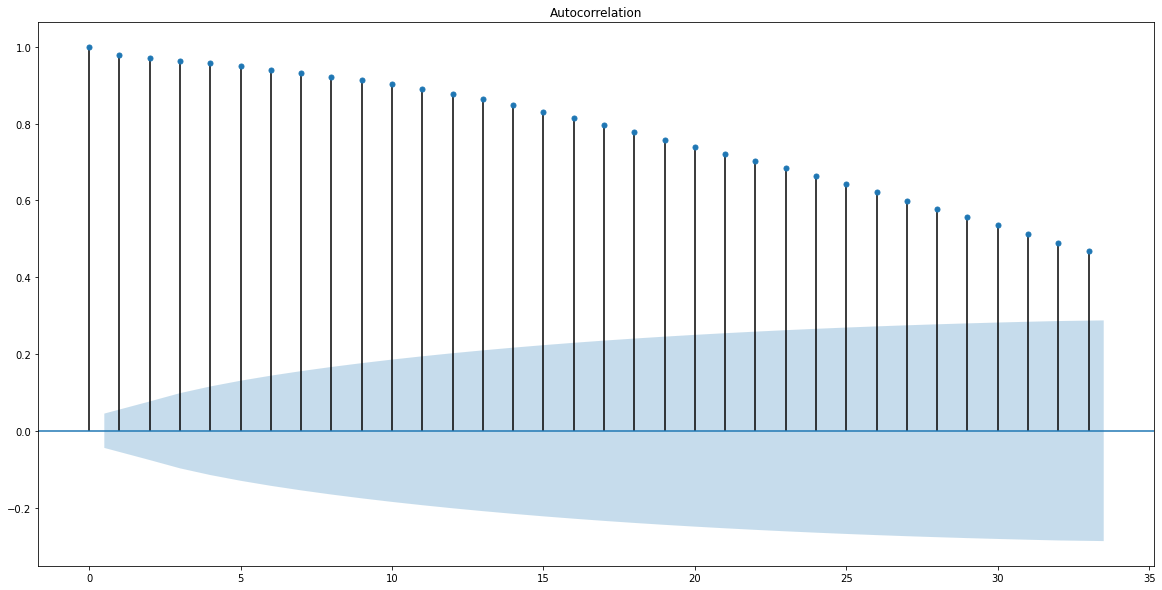

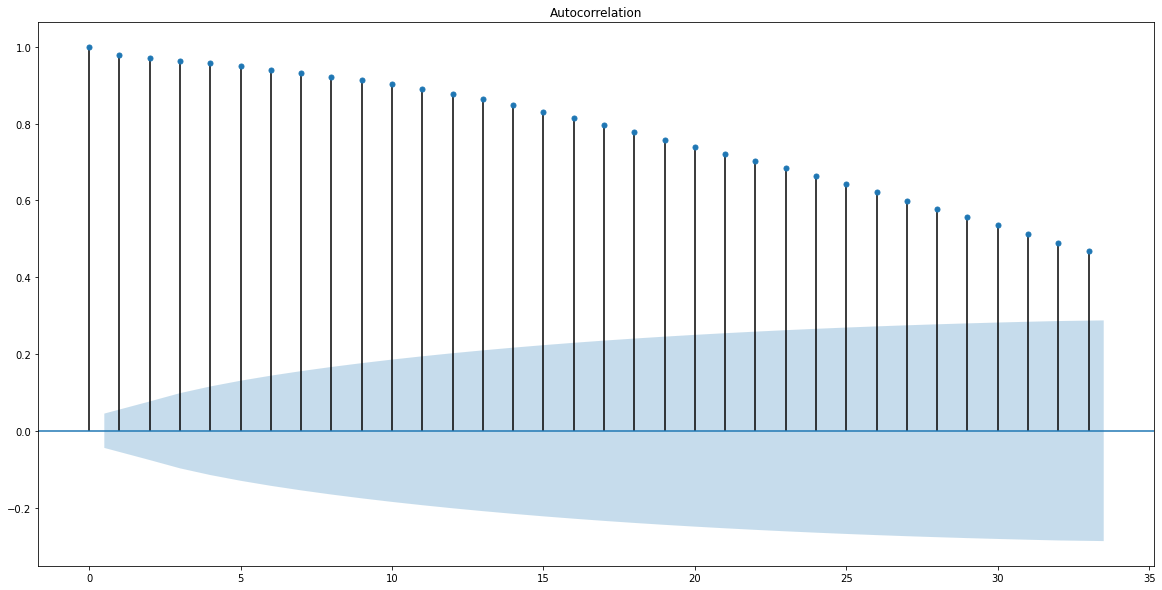

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#import statsmodel.graphics.tsaplots 
plot_acf(var.Flow)

<function matplotlib.pyplot.show>

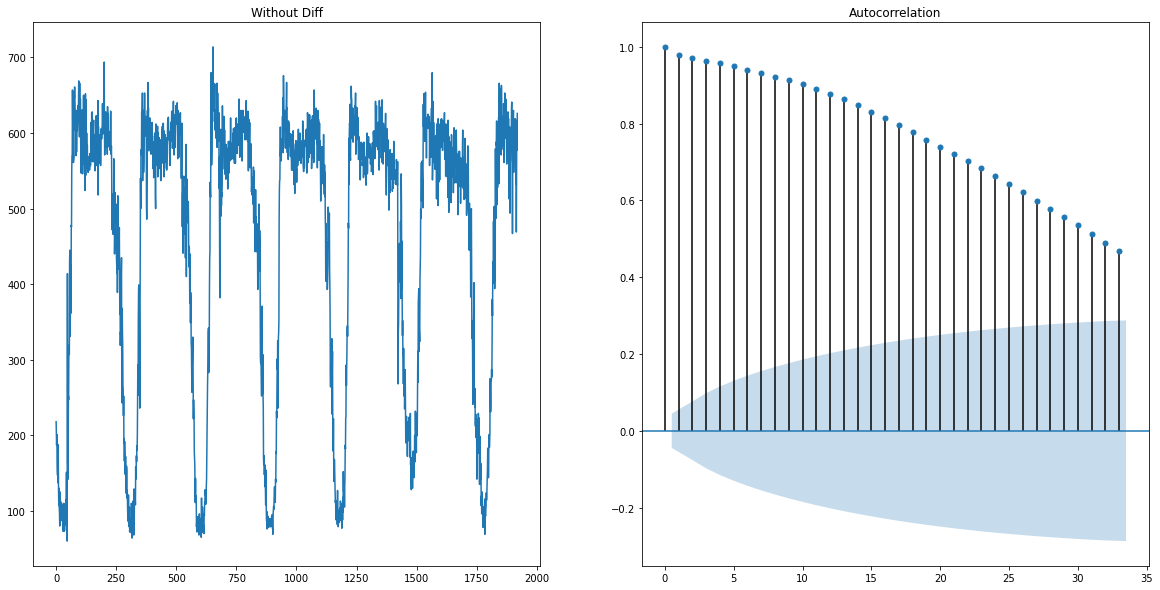

In [ ]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('Without Diff')
ax1.plot(var.Flow.dropna())

ax2=f.add_subplot(122)
plot_acf(var.Flow.dropna(),ax=ax2)
plt.show

<function matplotlib.pyplot.show>

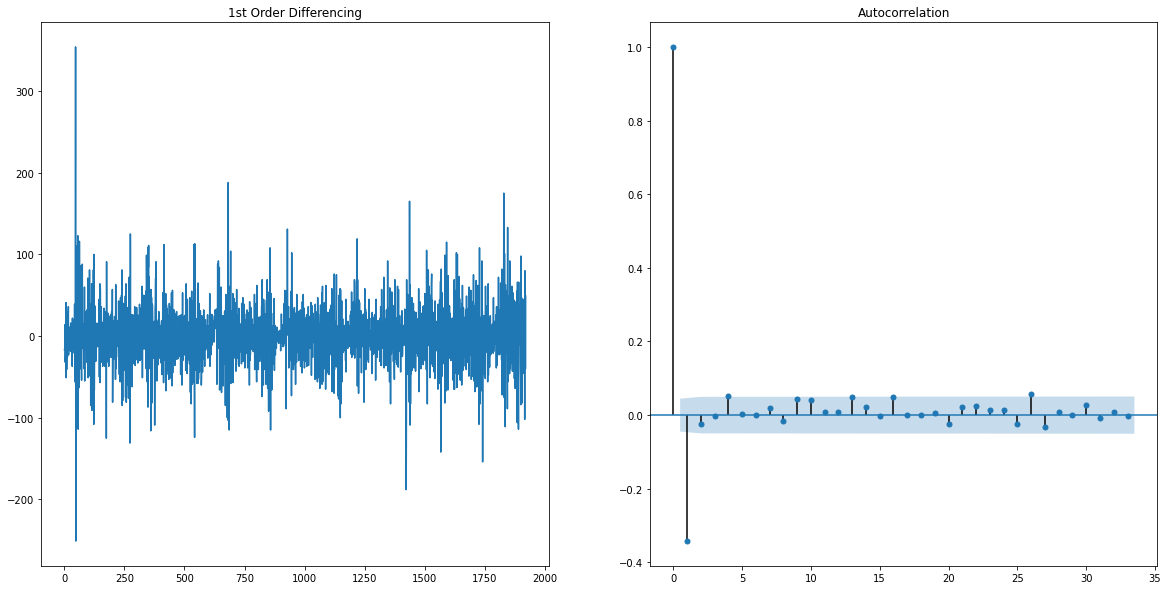

In [ ]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(var.Flow.diff())

ax2=f.add_subplot(122)
plot_acf(var.Flow.diff().dropna(),ax=ax2)
plt.show
                  

In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(var.Flow.dropna())
print("d-Flow: ", result[1])

result=adfuller(var.Flow.diff().dropna())
print("d-Flow: ", result[1])

result=adfuller(var.Flow.diff().diff().dropna())
print("d-Flow: ", result[1])

d-Flow:  9.214630808277632e-08
d-Flow:  3.3750904831370684e-08
d-Flow:  0.0


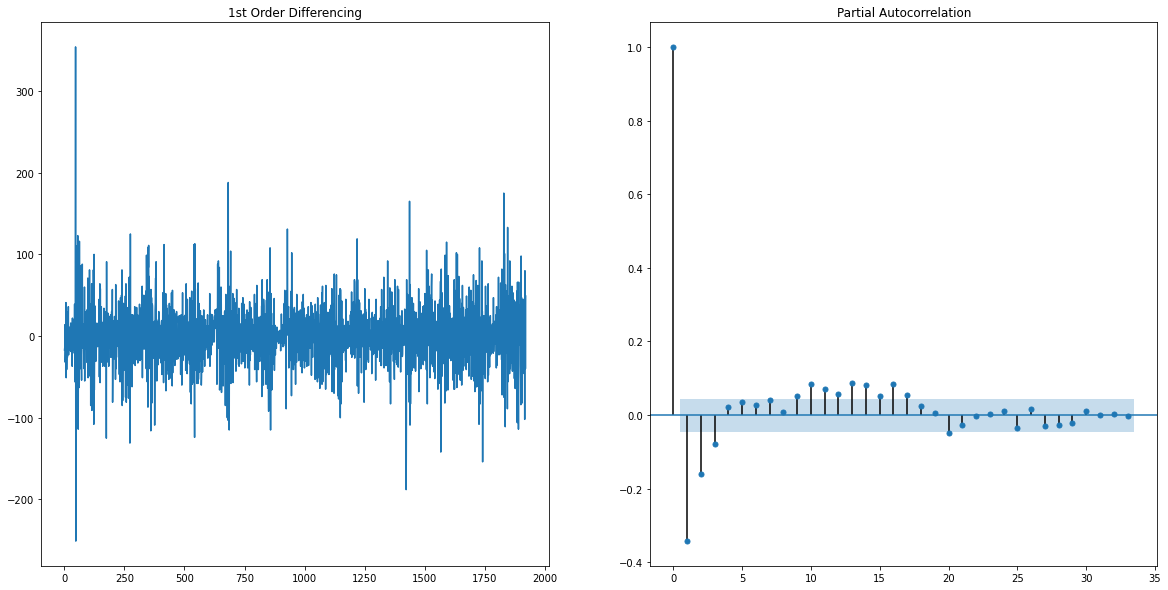

In [ ]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(var.Flow.diff())
ax2=f.add_subplot(122)
plot_pacf(var.Flow.diff().dropna(),ax=ax2)
plt.show()

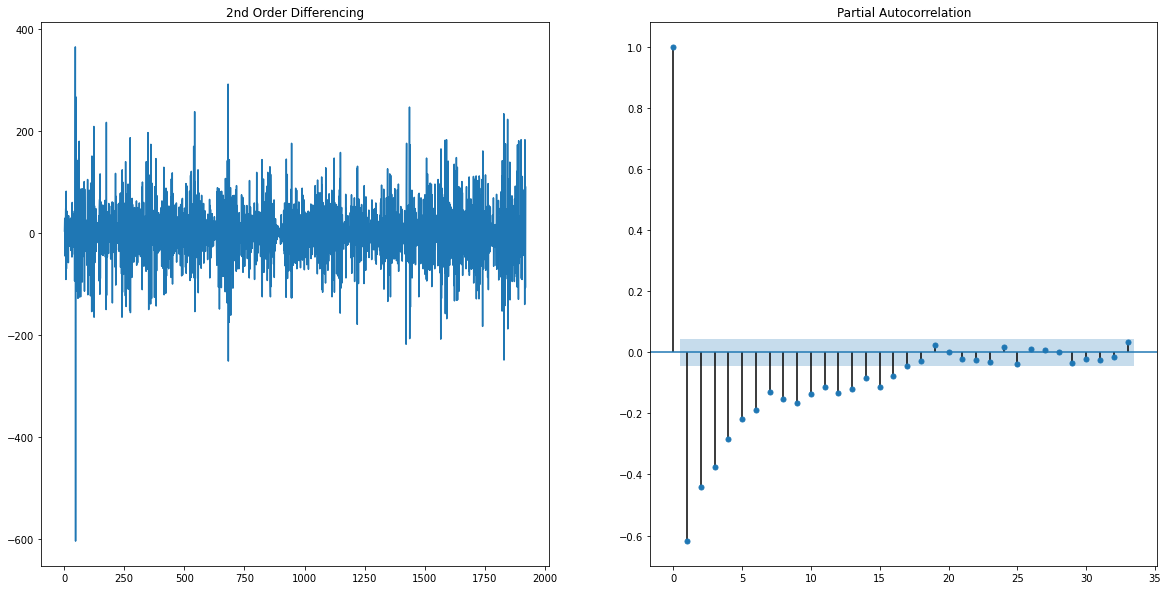

In [ ]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(var.Flow.diff().diff())
ax2=f.add_subplot(122)
plot_pacf(var.Flow.diff().diff().dropna(),ax=ax2)
plt.show()

so far p=1 and d=0 and q=2

In [ ]:
from statsmodels.tsa.arima_model import ARIMA


arima_model=ARIMA(var.Flow,order=(1,0,2))
model=arima_model.fit()
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                   Flow   No. Observations:                 1920
Model:                     ARMA(1, 2)   Log Likelihood               -9600.678
Method:                       css-mle   S.D. of innovations             35.892
Date:                Wed, 20 Apr 2022   AIC                          19211.355
Time:                        21:41:06   BIC                          19239.156
Sample:                             0   HQIC                         19221.584
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        453.1310     68.994      6.568      0.000     317.905     588.357
ar.L1.Flow     0.9934      0.003    382.470      0.000       0.988       0.998
ma.L1.Flow    -0.4039      0.024    -17.131      0.0

the scores such as Akaike Information Critera (AIC), Bayesian Information Criterion (BIC), Hannan-Quinn Information Criterion (HQIC), and the standard deviation of innovations (innovations are the difference of the real value at time t and the predicted value at that time).

In [44]:
#from statsmodels.tsa.arima_model import ARIMA


#arima_model=ARIMA(var.Flow,order=(1,1,2))
#model=arima_model.fit()
#print(model.summary())

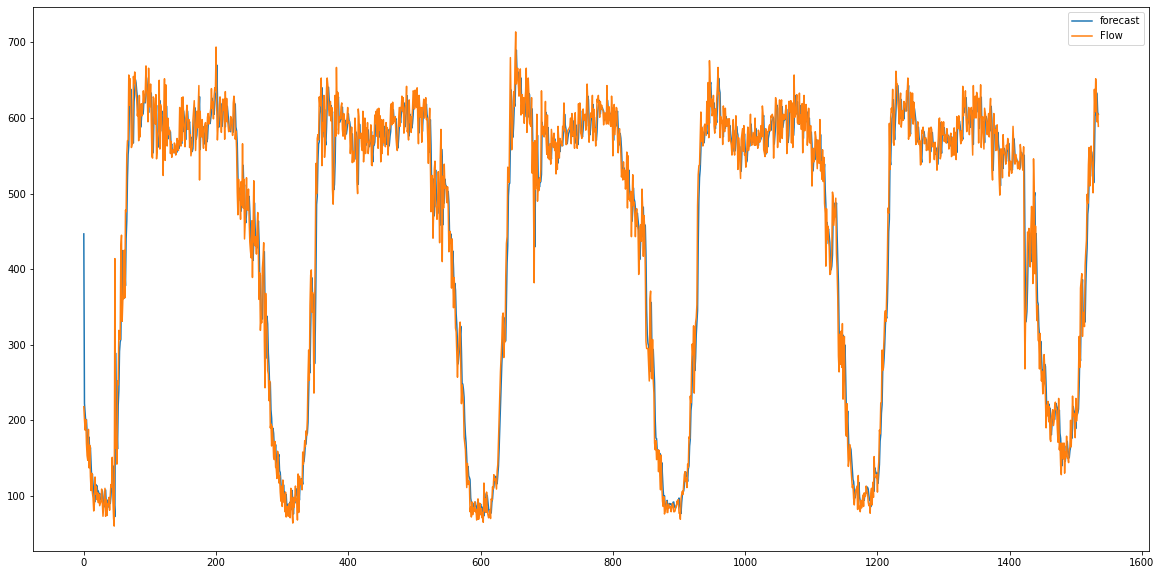

In [45]:
model.plot_predict(dynamic=False)
plt.show()

In [51]:
#testing with 300 sample off the data
from statsmodels.tsa.arima_model import ARIMA
arima_model=ARIMA(var.Flow[:300],order=(1,0,2))
model=arima_model.fit()
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                   Flow   No. Observations:                  300
Model:                     ARMA(1, 2)   Log Likelihood               -1543.715
Method:                       css-mle   S.D. of innovations             41.296
Date:                Wed, 20 Apr 2022   AIC                           3097.429
Time:                        22:07:38   BIC                           3115.948
Sample:                             0   HQIC                          3104.841
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.6555    176.766      1.582      0.115     -66.800     626.111
ar.L1.Flow     0.9953      0.004    237.099      0.000       0.987       1.003
ma.L1.Flow    -0.5113      0.059     -8.697      0.0

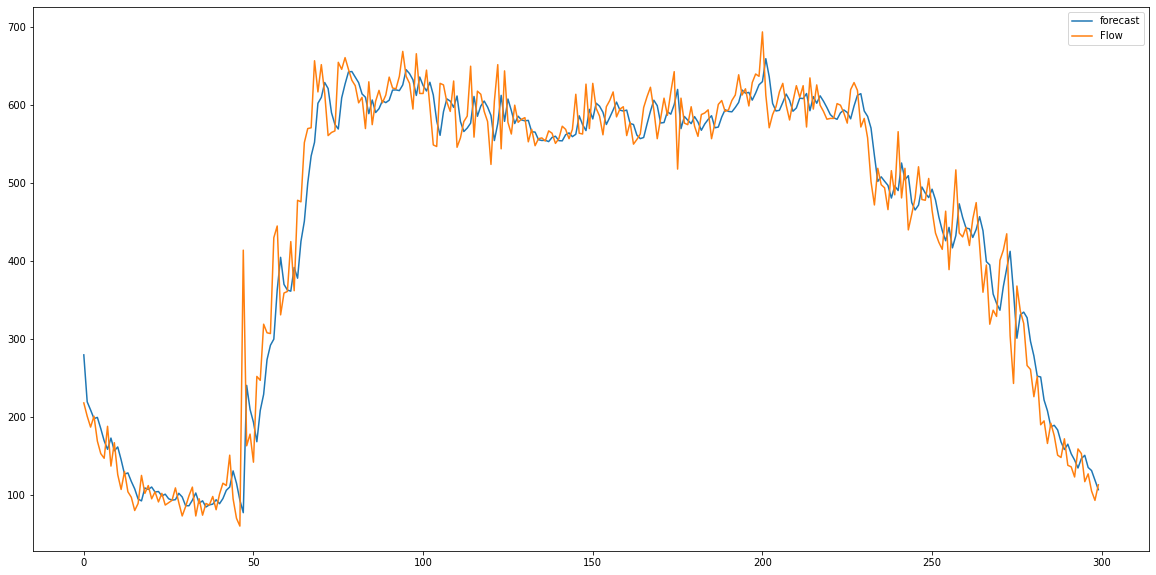

In [52]:
model.plot_predict(dynamic=False)
plt.show()

In [57]:
#Presiction data sample
y_pred=pd.Series(model.forecast(384)[0], index=var.Flow[1536:].index)
y_true=var.Flow[1536:]

print(np.array(y_pred).astype(np.uint8))
print(np.array(y_true))

[110 111 111 112 113 114 114 115 116 117 118 118 119 120 121 121 122 123
 124 124 125 126 127 127 128 129 129 130 131 132 132 133 134 134 135 136
 136 137 138 138 139 140 140 141 142 142 143 144 144 145 146 146 147 147
 148 149 149 150 151 151 152 152 153 154 154 155 155 156 156 157 158 158
 159 159 160 160 161 162 162 163 163 164 164 165 165 166 167 167 168 168
 169 169 170 170 171 171 172 172 173 173 174 174 175 175 176 176 177 177
 178 178 179 179 180 180 181 181 181 182 182 183 183 184 184 185 185 186
 186 186 187 187 188 188 189 189 189 190 190 191 191 192 192 192 193 193
 194 194 194 195 195 196 196 196 197 197 198 198 198 199 199 200 200 200
 201 201 201 202 202 203 203 203 204 204 204 205 205 205 206 206 206 207
 207 207 208 208 208 209 209 209 210 210 210 211 211 211 212 212 212 213
 213 213 214 214 214 215 215 215 215 216 216 216 217 217 217 218 218 218
 218 219 219 219 220 220 220 220 221 221 221 222 222 222 222 223 223 223
 223 224 224 224 224 225 225 225 225 226 226 226 22

In [58]:
import pprint
y_pred=pd.Series(model.forecast(384)[0], index=var.Flow[1536:].index)
y_true=var.Flow[1536:]

mape=np.mean(np.abs(y_pred - y_true)/np.abs(y_true)) # Mean Absolute Error
mae=np.mean(np.abs(y_pred -y_true)) # Mean Absolute Error
mpe=np.mean((y_pred - y_true)/y_true) # Mean Percentage Error
rmse=np.mean((y_pred - y_true)**2)**0.5 # Root Mean Squared
corr=np.corrcoef(y_pred,y_true)[0,1]  # Correlation Coefficient

mins=np.amin(np.hstack([y_pred[:,None], y_true[:,None]]),axis=1)
maxs=np.amax(np.hstack([y_pred[:,None], y_true[:,None]]),axis=1)
minmax=1- np.mean(mins/maxs) # Min-Max Error

pprint.pprint({'Mean Absolute Error': mape,'Mean Absolute Error':mae,'Mean Percentage Error':mpe,'Root Mean Squared':rmse, 'Correlation Coefficient': corr,'Min-Max Error':minmax})



{'Correlation Coefficient': -0.3391137499879362,
 'Mean Absolute Error': 304.64653599692576,
 'Mean Percentage Error': -0.4125044588342024,
 'Min-Max Error': 0.5715630949451151,
 'Root Mean Squared': 336.32018976947427}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


In [59]:
n=np.array(df[:384]).shape[0]
d=np.abs(np.diff(np.array(df[:1536].Flow))).sum()/(n-1)

errors=np.abs(y_true - y_pred)
print(errors.mean()/d)

2.82175630681554
